In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('../../Data/rejected.csv')

In [4]:
rejected = rejected.rename(columns={"Risk_Score":"Risk Score"})

In [5]:
rejected.head(3)

,Amount Requested,Application Date,Loan Title,Risk Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0


In [6]:
rejected.shape

(27648741, 9)

In [7]:
rejected.isnull().sum().sort_values(ascending=False)

Risk Score              18497630
Employment Length         951355
Loan Title                  1303
Policy Code                  918
Zip Code                     293
State                         22
Amount Requested               0
Application Date               0
Debt-To-Income Ratio           0
dtype: int64

In [8]:
rejected['Risk Score'].value_counts(dropna=False)

NaN      18497630
501.0      178456
643.0       89033
0.0         86754
620.0       82840
           ...   
319.0           5
318.0           4
307.0           4
305.0           4
317.0           4
Name: Risk Score, Length: 693, dtype: int64

In [9]:
rejected['Risk Score'].replace(0, np.nan, inplace=True)

In [10]:
rejected['Risk Score'].value_counts(dropna=False)

NaN      18584384
501.0      178456
643.0       89033
620.0       82840
652.0       75531
           ...   
319.0           5
318.0           4
307.0           4
305.0           4
317.0           4
Name: Risk Score, Length: 692, dtype: int64

In [11]:
#rejected.dtypes

In [21]:
missing_values = rejected.isnull().sum()
missing_values = missing_values[missing_values > 1500]
missing_values.sort_values(inplace=True)
missing_values.sort_values(ascending=False)

Risk Score           18584384
Employment Length      951355
dtype: int64

In [22]:
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

In [23]:
missing_values

,count,Name
Name,,
Employment Length,951355,Employment Length
Risk Score,18584384,Risk Score


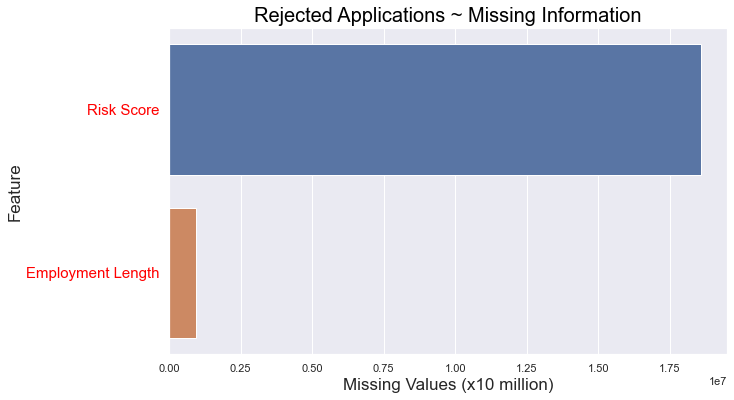

In [25]:
plt.figure(figsize=(10,6))

sns.barplot(x = 'count', y = 'Name', data=missing_values, orient="h", 
           order = missing_values.sort_values('count', ascending=False).Name)


plt.title('Rejected Applications ~ Missing Information', size=20, color='black')
plt.xlabel('Missing Values (x10 million)', size=17)
plt.ylabel('Feature', size=17)
plt.yticks(size=15, color='red');

In [ ]:
#missing_values = rejected.isnull().sum() / len(rejected)
#missing_values = missing_values[missing_values > 0.02]
#missing_values.sort_values(inplace=True)
#missing_values.sort_values(ascending=False)